## 0. Integrantes del equipo de trabajo
---


1. Rosmer Manuel Vargas Contreras
2. Cristian Adolfo Baquero Pico
3. Edwin Alejandro Mateus Rodríguez


## 1. Lectura de datos y depuración
---

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("C:/Users/rosme/OneDrive/Documentos/UNAL/Maestría/Semestre 3/validacionTroncal20250511/20250511.csv")

In [ ]:
df1.columns

Index(['Acceso_Estacion', 'Day_Group_Type', 'Dispositivo', 'Emisor',
       'Estacion_Parada', 'Fase', 'Fecha_Clearing', 'Fecha_Transaccion',
       'Hora_Pico_SN', 'ID_Vehiculo', 'Linea', 'Nombre_Perfil',
       'Numero_Tarjeta', 'Operador', 'Ruta', 'Saldo_Despues_Transaccion',
       'Saldo_Previo_a_Transaccion', 'Sistema', 'Tipo_Tarifa', 'Tipo_Tarjeta',
       'Tipo_Vehiculo', 'Valor', 'archivo'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', 1000)

In [ ]:
df1.head()

,Acceso_Estacion,Day_Group_Type,Dispositivo,Emisor,Estacion_Parada,Fase,Fecha_Clearing,Fecha_Transaccion,Hora_Pico_SN,ID_Vehiculo,Linea,Nombre_Perfil,Numero_Tarjeta,Operador,Ruta,Saldo_Despues_Transaccion,Saldo_Previo_a_Transaccion,Sistema,Tipo_Tarifa,Tipo_Tarjeta,Tipo_Vehiculo,Valor,archivo
0,(KB) DESALIMENTACION K.CENTRAL. HOSPITAL. COR...,Dia 1,10000772,(3101000) Bogota Card(Citizen),(05100) Banderas P. Central,Fase 3,2024-07-22,2024-07-22 03:51:28,Peak Time,NaN,(31) Zona F Av. Américas,(002) Adulto Mayor,09d1296f5a750550bc1216d20ef69a0b68886b23aaa34f...,(201) Trunk agency,NaN,346900.0,349400.0,TRONCAL,"1,0",tullave Plus,NaN,2500.0,Validacion_Troncal_20240722.zip
1,(11) PLATAFORMA 1 ALIMENTACION,Dia 1,10001321,(3101000) Bogota Card(Citizen),(07006) General Santander,Fase 3,2024-07-22,2024-07-22 03:52:34,Peak Time,NaN,(30) Zona G NQS Sur,(005) Discapacidad,7927b6c29ff3b9c97d5628a2b97ac615018d0ca1770242...,(201) Trunk agency,NaN,19650.0,19650.0,TRONCAL,"2,0",tullave Plus,NaN,0.0,Validacion_Troncal_20240722.zip
2,(KA) ALIMENTACION K.CENTRAL. HOSPITAL. CORABA...,Dia 1,10000775,(3101000) Bogota Card(Citizen),(05100) Banderas P. Central,Fase 3,2024-07-22,2024-07-22 03:52:38,Peak Time,NaN,(31) Zona F Av. Américas,(001) Adulto,5e5d6ee58a0eef02007bd08dcb03cde467ebbeea1e05ab...,(201) Trunk agency,NaN,20100.0,23050.0,TRONCAL,"1,0",tullave Plus,NaN,2950.0,Validacion_Troncal_20240722.zip
3,(BA) BATERIA VAGON ORIENTE PARQUE EL TUNAL,Dia 1,10000528,(3101000) Bogota Card(Citizen),(08001) Parque el Tunal,Fase 3,2024-07-22,2024-07-22 03:52:40,Peak Time,NaN,(34) Zona H Caracas Sur,(001) Anonymous,6bf2515acaa9cdd2ff14d5fd9c957310da6cce6197524c...,(201) Trunk agency,NaN,11200.0,14150.0,TRONCAL,"1,0",tullave Básica,NaN,2950.0,Validacion_Troncal_20240722.zip
4,(LA) ALIMENTACION CASTILLA Y BIBLIOTECA TINTAL,Dia 1,10000786,(3101000) Bogota Card(Citizen),(05100) Banderas P. Central,Fase 3,2024-07-22,2024-07-22 03:53:20,Peak Time,NaN,(31) Zona F Av. Américas,(001) Anonymous,47ff6dc9fbee8d7324f8062d4f02ea1dbaf71251052db3...,(201) Trunk agency,NaN,17600.0,20550.0,TRONCAL,"1,0",tullave Básica,NaN,2950.0,Validacion_Troncal_20240722.zip


In [ ]:
import pandas as pd
import os

# Primero, contamos cuántas veces aparece cada número de tarjeta
conteo_tarjetas = df1['Numero_Tarjeta'].value_counts()

# Obtenemos los números de tarjeta que aparecen exactamente 2 veces
tarjetas_dos_veces = conteo_tarjetas[conteo_tarjetas == 2].index

# Filtramos el DataFrame para mantener solo las filas con esos números de tarjeta
df_filtrado = df1[df1['Numero_Tarjeta'].isin(tarjetas_dos_veces)]

# Creamos la carpeta "cleaned" si no existe
if not os.path.exists('cleaned'):
    os.makedirs('cleaned')

# Guardamos el DataFrame filtrado en formato pickle
df_filtrado.to_pickle('cleaned/Troncal_20250511.pkl')

# Imprimimos información sobre el resultado
print(f"Se han filtrado {len(df_filtrado)} filas con {len(tarjetas_dos_veces)} números de tarjeta diferentes")
print(f"El archivo se ha guardado en 'cleaned/Troncal_20240511.pkl'")

Se han filtrado 263436 filas con 131718 números de tarjeta diferentes
El archivo se ha guardado en 'cleaned/Troncal_20240511.pkl'


## 2. Planteamiento de la red
---

In [ ]:
import pandas as pd
import numpy as np
import glob
import networkx as nx
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta base para Google Colab
RUTA_BASE = '/content/drive/Shareddrives/6. Network Science for Data Analytics/Datos/cleaned/'

Mounted at /content/drive


In [ ]:
# Cargar archivos de 2024 y 2025 desde la ruta de Colab
def cargar_datos_por_año_colab():
    archivos_2024 = glob.glob(os.path.join(RUTA_BASE, 'Troncal_2024*.pkl'))
    archivos_2025 = glob.glob(os.path.join(RUTA_BASE, 'Troncal_2025*.pkl'))
    dfs_2024 = [pd.read_pickle(archivo) for archivo in archivos_2024]
    dfs_2025 = [pd.read_pickle(archivo) for archivo in archivos_2025]
    # df_2024 = pd.concat(dfs_2024, ignore_index=True)
    # df_2025 = pd.concat(dfs_2025, ignore_index=True)
    return dfs_2024, dfs_2025

In [ ]:
dfs_2024, dfs_2025 = cargar_datos_por_año_colab()

In [ ]:
RUTA_BASE_EXPORTAR = '/content/drive/Shareddrives/6. Network Science for Data Analytics/Entrega final/Datos/'

def normalizar_nombre_estacion(nombre):
    nombre = nombre.lower()
    nombre = ' '.join(nombre.split())
    return nombre

def generar_archivos_nodos_aristas(dataframes, anio):
    # Parte 1: Extraer todas las estaciones únicas de todos los dataframes
    todas_las_estaciones = set()
    for df in dataframes:
        estaciones = df['Estacion_Parada'].apply(normalizar_nombre_estacion).unique()
        todas_las_estaciones.update(estaciones)

    estaciones = sorted(todas_las_estaciones)
    df_nodos = pd.DataFrame({'Id': estaciones, 'Label': estaciones})
    df_nodos.to_csv(f'{RUTA_BASE_EXPORTAR}nodos_{anio}.csv', index=False, encoding='utf-8')

    # Parte 2: Generar aristas para cada dataframe y combinar
    lista_aristas = []

    for df in dataframes:
        conexiones = []
        for tarjeta, grupo in df.groupby('Numero_Tarjeta'):
            estaciones = grupo.sort_values('Fecha_Transaccion')['Estacion_Parada'].apply(normalizar_nombre_estacion).tolist()
            for i in range(len(estaciones) - 1):
                origen = estaciones[i]
                destino = estaciones[i + 1]
                if origen != destino:
                    nodo1, nodo2 = sorted([origen, destino])
                    conexiones.append((nodo1, nodo2, tarjeta))

        df_aristas = pd.DataFrame(conexiones, columns=['Source', 'Target', 'Tarjeta'])
        df_aristas = df_aristas.groupby(['Source', 'Target'])['Tarjeta'].nunique().reset_index()
        df_aristas.rename(columns={'Tarjeta': 'Weight'}, inplace=True)
        lista_aristas.append(df_aristas)

    # Combinar todos los df_aristas sumando los pesos
    df_aristas_combinado = pd.concat(lista_aristas)
    df_aristas_combinado = df_aristas_combinado.groupby(['Source', 'Target'])['Weight'].sum().reset_index()

    df_aristas_combinado.to_csv(f'{RUTA_BASE_EXPORTAR}aristas_{anio}.csv', index=False, encoding='utf-8')

In [ ]:
generar_archivos_nodos_aristas(dfs_2024, 2024)

In [ ]:
generar_archivos_nodos_aristas(dfs_2025, 2025)

## 3. Creación de redes
---

In [ ]:
def generar_grafo_no_dirigido(anio):
    """
    Genera un grafo no dirigido a partir de los archivos de nodos y aristas del año especificado.
    """
    nodos_csv = f'nodos_{anio}.csv'
    aristas_csv = f'aristas_{anio}.csv'
    G1 = nx.Graph()
    nodos = pd.read_csv(nodos_csv)
    aristas = pd.read_csv(aristas_csv)
    for _, row in nodos.iterrows():
        G1.add_node(row['Id'], label=row['Label'])
    for _, row in aristas.iterrows():
        G1.add_edge(row['Source'], row['Target'], weight=row['Weight'])
    print(f"Grafo para {anio}:")
    print(f"Nodos: {G1.number_of_nodes()}")
    print(f"Aristas: {G1.number_of_edges()}")
    return G1

In [ ]:
G_2024 = generar_grafo_no_dirigido(2024)
G_2025 = generar_grafo_no_dirigido(2025)

Grafo para 2024:
Nodos: 148
Aristas: 10486
Grafo para 2025:
Nodos: 145
Aristas: 10104


In [ ]:
nx.write_graphml(G_2024, "G_2024.graphml")
nx.write_graphml(G_2025, "G_2025.graphml")

## 4. Análisis exploratorio de las redes
---

### 4.1. Análisis de cambios

Rutas Comunes entre 2024 y 2025

In [ ]:
common_edges = set(G_2024.edges()) & set(G_2025.edges())

cambios = []
for u, v in common_edges:
    w2024 = G_2024[u][v]['weight']
    w2025 = G_2025[u][v]['weight']
    cambio = w2025 - w2024
    cambios.append((u, v, w2024, w2025, cambio))

In [ ]:
df_cambios = pd.DataFrame(cambios, columns=['Estación 1', 'Estación 2', 'Peso 2024', 'Peso 2025', 'Cambio'])
df_cambios['Cambio Porcentual'] = round((df_cambios['Cambio'] / df_cambios['Peso 2024'])*100,1)
# Ordenar de forma descendente por grado
df_cambios = df_cambios.sort_values(by='Cambio', ascending=False).reset_index(drop=True)

In [ ]:
df_cambios.head(50)

,Estación 1,Estación 2,Peso 2024,Peso 2025,Cambio,Cambio Porcentual
0,(05000) portal américas,(14005) las aguas - centro colombo americano,579,6478,5899,1018.8
1,(03000) portal suba,(09121) flores – areandina,5342,9649,4307,80.6
2,(05100) banderas p. central,(14005) las aguas - centro colombo americano,519,3803,3284,632.8
3,(04000) cabecera calle 80,(09121) flores – areandina,5001,8137,3136,62.7
4,(04000) cabecera calle 80,(09119) calle 57,4479,7174,2695,60.2
5,(08000) portal tunal,(09110) avenida jimenez,7578,10077,2499,33.0
6,(08000) portal tunal,(09119) calle 57,3967,6465,2498,63.0
7,(04000) cabecera calle 80,(09123) calle 76 - san felipe,5488,7839,2351,42.8
8,(03000) portal suba,(09119) calle 57,5878,8175,2297,39.1
9,(09000) cabecera usme,(10006) san victorino - neos centro,729,2874,2145,294.2


Vemos rutas como "Portal Américas - Las Aguas" que del 2024 al 2025 han tenido un 1018% más usuarios que hacen este recorrido, y así vemos las demás rutas que han tenido mayores cambios nominalmente como "Portal Suba - Flores" o "Banderas - Las Aguas"

In [ ]:
df_cambios.tail(50)[::-1]

,Estación 1,Estación 2,Peso 2024,Peso 2025,Cambio,Cambio Porcentual
8398,(05000) portal américas,(09110) avenida jimenez,17892,12150,-5742,-32.1
8397,(05100) banderas p. central,(09110) avenida jimenez,9321,5867,-3454,-37.1
8396,(05000) portal américas,(05105) pradera – plaza central,12079,8827,-3252,-26.9
8395,(05002) tintal,(09110) avenida jimenez,4726,3278,-1448,-30.6
8394,(05000) portal américas,(10007) las nieves,4893,3684,-1209,-24.7
8393,(05100) banderas p. central,(05105) pradera – plaza central,3949,2885,-1064,-26.9
8392,(05002) tintal,(05105) pradera – plaza central,3336,2365,-971,-29.1
8391,(05100) banderas p. central,(10007) las nieves,2962,2044,-918,-31.0
8390,(07103) av. chile,(10000) portal 20 de julio,2650,2042,-608,-22.9
8389,(05000) portal américas,(12004) carrera 22,4919,4386,-533,-10.8


Vemos rutas como "Portal Américas - Avenida Jimenez" que del 2024 al 2025 han tenido un 32% menos usuarios que hacen este recorrido, y así vemos las demás rutas que han tenido mayores decrecimientos nominalmente como "Banderas - Avenida Jimenez" o "Portal Américas - Pradera"

Todas las rutas presentes en 2024 y 2025

In [ ]:
# Unión de todas las aristas (rutas) de ambos grafos
all_edges = set(G_2024.edges()) | set(G_2025.edges())

cambios = []
for u, v in all_edges:
    w2024 = G_2024[u][v]['weight'] if G_2024.has_edge(u, v) else 0
    w2025 = G_2025[u][v]['weight'] if G_2025.has_edge(u, v) else 0
    cambio = w2025 - w2024
    cambios.append((u, v, w2024, w2025, cambio))

In [ ]:
df_cambios = pd.DataFrame(cambios, columns=['Estación 1', 'Estación 2', 'Peso 2024', 'Peso 2025', 'Cambio'])
df_cambios['Cambio Porcentual'] = round((df_cambios['Cambio'] / df_cambios['Peso 2024'])*100,1)
# Ordenar de forma descendente por grado
df_cambios = df_cambios.sort_values(by='Cambio', ascending=False).reset_index(drop=True)

In [ ]:
df_cambios.head(50)

,Estación 1,Estación 2,Peso 2024,Peso 2025,Cambio,Cambio Porcentual
0,(06000) portal el dorado - c.c. nuestro bogota,(50008) corral portal dorado,0,66842,66842,inf
1,(02000) portal norte - unicervantes,(02300) calle 100 - marketmedios,0,14423,14423,inf
2,(02000) portal norte - unicervantes,(05000) portal américas,0,10099,10099,inf
3,(02000) portal norte - unicervantes,(04000) cabecera calle 80,0,8711,8711,inf
4,(02000) portal norte - unicervantes,(09119) calle 57,0,7744,7744,inf
5,(05000) portal américas,(14004) museo del oro,0,7733,7733,inf
6,(02000) portal norte - unicervantes,(09121) flores – areandina,0,7660,7660,inf
7,(02000) portal norte - unicervantes,(09123) calle 76 - san felipe,0,6898,6898,inf
8,(02000) portal norte - unicervantes,(07000) portal sur jfk coop. financiera,0,6871,6871,inf
9,(03000) portal suba,(09115) calle 34 - fondo nacional de garantias,0,6522,6522,inf


Vemos rutas como "Portal Américas - Las Aguas" que del 2024 al 2025 han tenido un 1018% más usuarios que hacen este recorrido, y así vemos las demás rutas que han tenido mayores cambios nominalmente como "Portal Suba - Flores" o "Banderas - Las Aguas"

In [ ]:
df_cambios.tail(50)[::-1]

,Estación 1,Estación 2,Peso 2024,Peso 2025,Cambio,Cambio Porcentual
12190,(06000) portal eldorado,(50008) corral portal dorado,61137,0,-61137,-100.0
12189,(02000) cabecera autopista norte,(02300) calle 100 - marketmedios,13465,0,-13465,-100.0
12188,(02000) cabecera autopista norte,(05000) portal américas,10208,0,-10208,-100.0
12187,(02000) cabecera autopista norte,(04000) cabecera calle 80,7727,0,-7727,-100.0
12186,(02000) cabecera autopista norte,(07000) portal sur jfk coop. financiera,6900,0,-6900,-100.0
12185,(05000) portal américas,(09120) calle 63,6205,0,-6205,-100.0
12184,(03000) portal suba,(09115) calle 34,5859,0,-5859,-100.0
12183,(05000) portal américas,(09110) avenida jimenez,17892,12150,-5742,-32.1
12182,(02000) cabecera autopista norte,(09123) calle 76 - san felipe,5608,0,-5608,-100.0
12181,(05000) portal américas,(10009) museo nacional,5531,0,-5531,-100.0


Vemos rutas como "Portal Américas - Avenida Jimenez" que del 2024 al 2025 han tenido un 32% menos usuarios que hacen este recorrido, y así vemos las demás rutas que han tenido mayores decrecimientos nominalmente como "Banderas - Avenida Jimenez" o "Portal Américas - Pradera"

In [ ]:
df_cambios = df_cambios.sort_values(by='Peso 2024', ascending=False).reset_index(drop=True)
print('Top 5 de rutas con más recorridos en 2024')
df_cambios.head(10)

Top 5 de rutas con más recorridos en 2024


,Estación 1,Estación 2,Peso 2024,Peso 2025,Cambio,Cambio Porcentual
0,(06000) portal eldorado,(50008) corral portal dorado,61137,0,-61137,-100.0
1,(05000) portal américas,(09110) avenida jimenez,17892,12150,-5742,-32.1
2,(02000) cabecera autopista norte,(02300) calle 100 - marketmedios,13465,0,-13465,-100.0
3,(05000) portal américas,(05105) pradera – plaza central,12079,8827,-3252,-26.9
4,(03000) portal suba,(03006) niza - calle 127,11251,12460,1209,10.7
5,(02000) cabecera autopista norte,(05000) portal américas,10208,0,-10208,-100.0
6,(02300) calle 100 - marketmedios,(04000) cabecera calle 80,9723,9906,183,1.9
7,(05100) banderas p. central,(09110) avenida jimenez,9321,5867,-3454,-37.1
8,(02300) calle 100 - marketmedios,(05000) portal américas,9118,8926,-192,-2.1
9,(02300) calle 100 - marketmedios,(07000) portal sur jfk coop. financiera,8626,9265,639,7.4


In [ ]:
df_cambios = df_cambios.sort_values(by='Peso 2025', ascending=False).reset_index(drop=True)
print('Top 5 de rutas con más recorridos en 2025')
df_cambios.head(10)

Top 5 de rutas con más recorridos en 2025


,Estación 1,Estación 2,Peso 2024,Peso 2025,Cambio,Cambio Porcentual
0,(06000) portal el dorado - c.c. nuestro bogota,(50008) corral portal dorado,0,66842,66842,inf
1,(02000) portal norte - unicervantes,(02300) calle 100 - marketmedios,0,14423,14423,inf
2,(03000) portal suba,(03006) niza - calle 127,11251,12460,1209,10.7
3,(05000) portal américas,(09110) avenida jimenez,17892,12150,-5742,-32.1
4,(02000) portal norte - unicervantes,(05000) portal américas,0,10099,10099,inf
5,(08000) portal tunal,(09110) avenida jimenez,7578,10077,2499,33.0
6,(02300) calle 100 - marketmedios,(04000) cabecera calle 80,9723,9906,183,1.9
7,(03000) portal suba,(09121) flores – areandina,5342,9649,4307,80.6
8,(02300) calle 100 - marketmedios,(07000) portal sur jfk coop. financiera,8626,9265,639,7.4
9,(02300) calle 100 - marketmedios,(07503) san mateo - c.c. unisur,8425,9006,581,6.9


### 4.2. Detectar rutas nuevas o desaparecidas

In [ ]:
nuevas_rutas = set(G_2025.edges()) - set(G_2024.edges())
rutas_eliminadas = set(G_2024.edges()) - set(G_2025.edges())

print(f'Número de rutas nuevas {len(nuevas_rutas)}')
print(f'Número de rutas eliminadas: {len(rutas_eliminadas)}')

Número de rutas nuevas 1705
Número de rutas eliminadas: 2087


In [ ]:
print(len(nuevas_rutas))
nuevas_rutas

1705


{('(03011) suba - calle 100',
  '(09115) calle 34 - fondo nacional de garantias'),
 ('(04108) polo – fincomercio', '(09103) olaya'),
 ('(03001) la campiña', '(04108) polo – fincomercio'),
 ('(09105) río fucha', '(14004) museo del oro'),
 ('(02303) calle 85 - gato dumas', '(50008) corral portal dorado'),
 ('(09005) danubio', '(09115) calle 34 - fondo nacional de garantias'),
 ('(09005) danubio', '(09107) hortúa'),
 ('(02303) calle 85 - gato dumas', '(10004) policarpa'),
 ('(06100) av. rojas – unisalesiana', '(09003) socorro'),
 ('(09100) calle 40 sur', '(09115) calle 34 - fondo nacional de garantias'),
 ('(02205) calle 106 - explora maletas', '(09116) avenida 39'),
 ('(04108) polo – fincomercio', '(09001) molinos'),
 ('(02202) calle 127 - l oreal paris',
  '(09115) calle 34 - fondo nacional de garantias'),
 ('(06100) av. rojas – unisalesiana', '(09000) cabecera usme'),
 ('(02205) calle 106 - explora maletas', '(03002) suba - tv- 91'),
 ('(02001) centro comercial santa fe',
  '(06000) po

In [ ]:
print(len(rutas_eliminadas))
rutas_eliminadas

2087


{('(02000) cabecera autopista norte',
  '(06101) el tiempo - camara de comercio de bogota'),
 ('(02202) calle 127', '(05005) transversal 86'),
 ('(03011) suba - calle 100', '(09115) calle 34'),
 ('(02001) centro comercial santa fe', '(06100) av. rojas'),
 ('(09115) calle 34', '(12001) carrera 43 - comapan'),
 ('(02205) calle 106', '(07104) 7 de agosto'),
 ('(02202) calle 127', '(07008) nqs - calle 30 sur'),
 ('(04103) las ferias', '(04108) el polo'),
 ('(04102) avenida boyaca', '(09111) calle 19'),
 ('(03004) gratamira', '(09120) calle 63'),
 ('(04001) quirigua', '(06103) can'),
 ('(02303) calle 85', '(06108) concejo de bogotá'),
 ('(05101) mandalay - cr.73', '(06103) can'),
 ('(06106) recinto ferial', '(09109) tercer milenio'),
 ('(06002) normandía', '(06103) can'),
 ('(02303) calle 85', '(06000) portal eldorado'),
 ('(03006) niza - calle 127', '(06000) portal eldorado'),
 ('(09100) calle 40 sur', '(09115) calle 34'),
 ('(06100) av. rojas', '(09103) olaya'),
 ('(02102) calle 161', '(5

### 4.3. Caracterizar Redes

In [ ]:
def caracterizar_red(G):
    grados = [d for n, d in G.degree()]
    clustering = nx.average_clustering(G)
    if nx.is_connected(G):
        path_length = nx.average_shortest_path_length(G)
    else:
        path_length = np.nan
    return {
        "media_grado": np.mean(grados),
        "max_grado": np.max(grados),
        "clustering": clustering,
        "path_length": path_length,
    }

In [ ]:
caracterizar_red(G_2024)

{'media_grado': np.float64(141.7027027027027),
 'max_grado': np.int64(146),
 'clustering': 0.9892489987168274,
 'path_length': 1.0360360360360361}

In [ ]:
caracterizar_red(G_2025)

{'media_grado': np.float64(139.3655172413793),
 'max_grado': np.int64(144),
 'clustering': 0.9909845710421866,
 'path_length': 1.032183908045977}

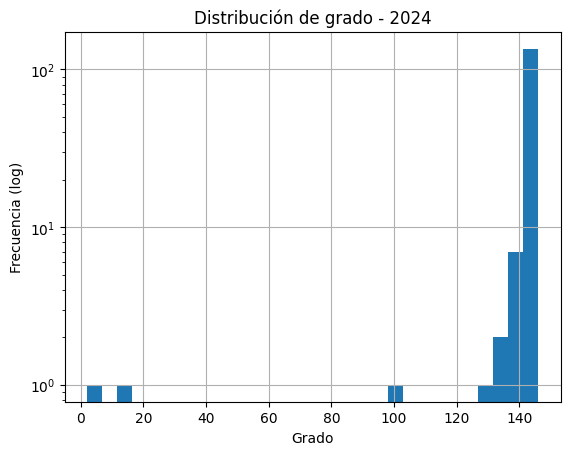

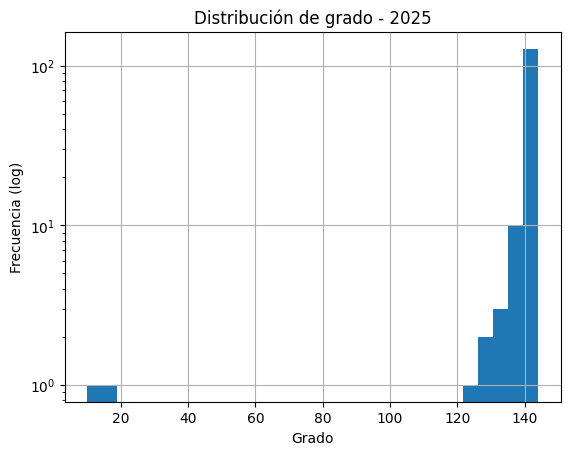

In [ ]:
import matplotlib.pyplot as plt

def plot_grado(G, titulo):
    grados = [d for n, d in G.degree()]
    plt.figure()
    plt.hist(grados, bins=30, log=True)
    plt.title(titulo)
    plt.xlabel("Grado")
    plt.ylabel("Frecuencia (log)")
    plt.grid(True)
    plt.show()

plot_grado(G_2024, "Distribución de grado - 2024")
plot_grado(G_2025, "Distribución de grado - 2025")

Tanto la red de 2024 como la de 2025 se comportan como redes de tipo mundo pequeño, debido a:

* La naturaleza densa y conectada del sistema de transporte.

* El alto coeficiente de clustering (cercano a 1 indica agrupamiento fuerte).

* La mínima longitud de camino promedio (1.03 sugiere acceso casi directo entre estaciones).

### 4.4. Visualizar redes

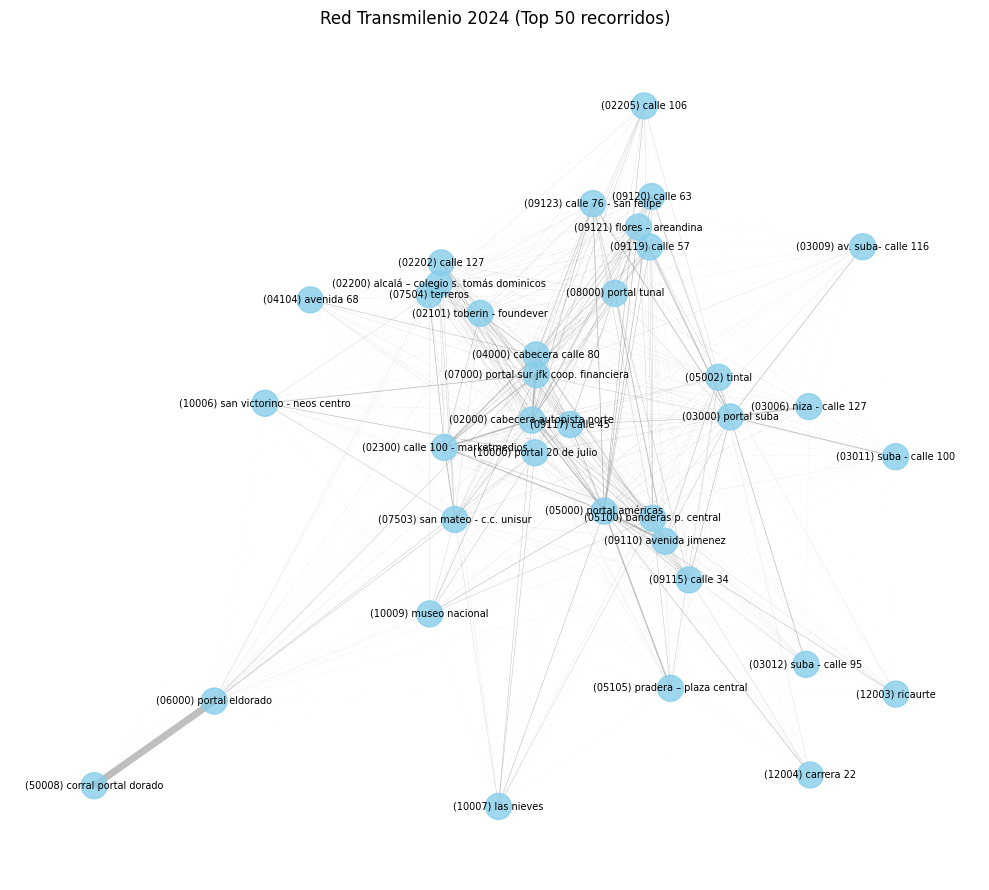

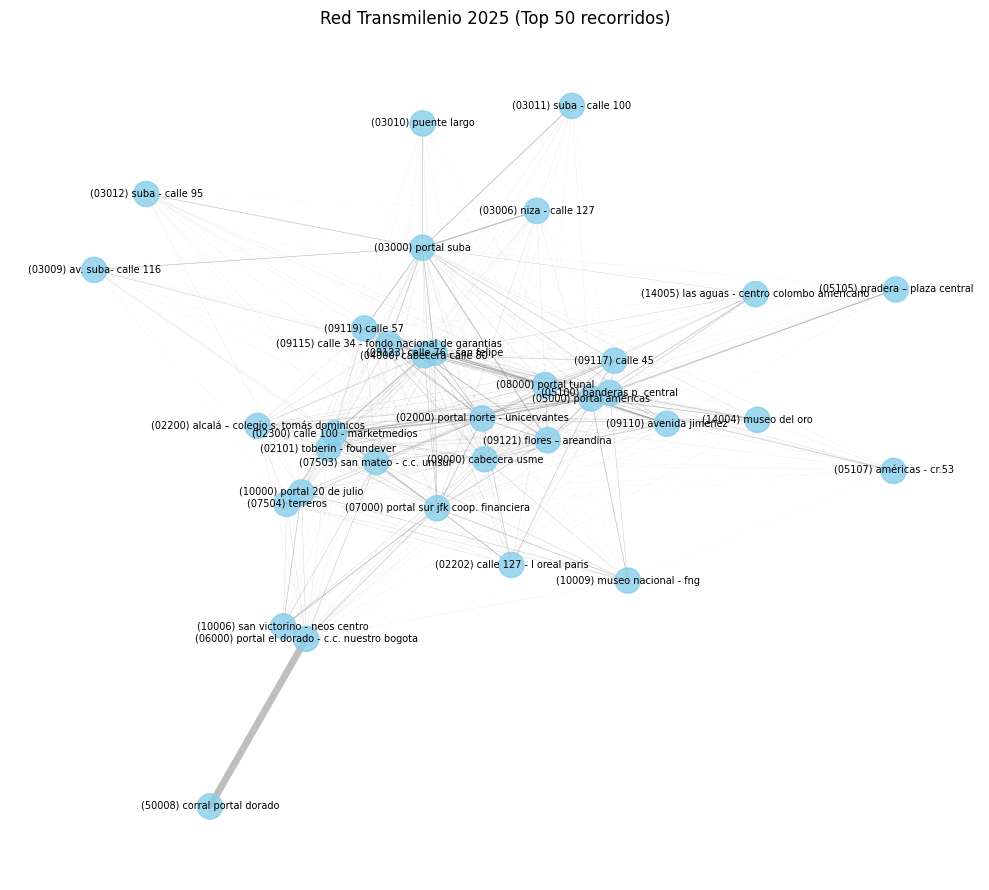

In [ ]:
# Función para extraer subgrafo con top N aristas más pesadas
def grafo_principal_por_peso(G, top_n=200):
    edges_sorted = sorted(G.edges(data=True), key=lambda x: float(x[2].get('weight', 0)), reverse=True)
    top_edges = edges_sorted[:top_n]
    top_nodes = set()
    for u, v, _ in top_edges:
        top_nodes.add(u)
        top_nodes.add(v)
    return G.subgraph(top_nodes).copy()

# Subgrafos más importantes
G_2024_top = grafo_principal_por_peso(G_2024, top_n=50)
G_2025_top = grafo_principal_por_peso(G_2025, top_n=50)

# Posiciones usando spring_layout
pos_2024 = nx.spring_layout(G_2024_top, seed=42)
pos_2025 = nx.spring_layout(G_2025_top, seed=42)

# Función para graficar
def dibujar_red(G, pos, titulo):
    pesos = [float(d.get('weight', 1)) for (_, _, d) in G.edges(data=True)]
    grados = dict(G.degree)
    nodos = list(G.nodes)
    tamaños_nodos = [grados[n]*10 for n in nodos]

    plt.figure(figsize=(10, 9))
    nx.draw_networkx_nodes(G, pos, node_size=tamaños_nodos, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=[w / max(pesos) * 5 for w in pesos], edge_color='gray', alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=7, font_color='black')
    plt.title(titulo)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Dibujar redes
dibujar_red(G_2024_top, pos_2024, "Red Transmilenio 2024 (Top 50 recorridos)")
dibujar_red(G_2025_top, pos_2025, "Red Transmilenio 2025 (Top 50 recorridos)")


#### Matriz de adyacencia tipo heatmap (ideal para comparar pesos entre estaciones)
Esto permite ver qué estaciones están más conectadas entre sí (por número de usuarios) top 20

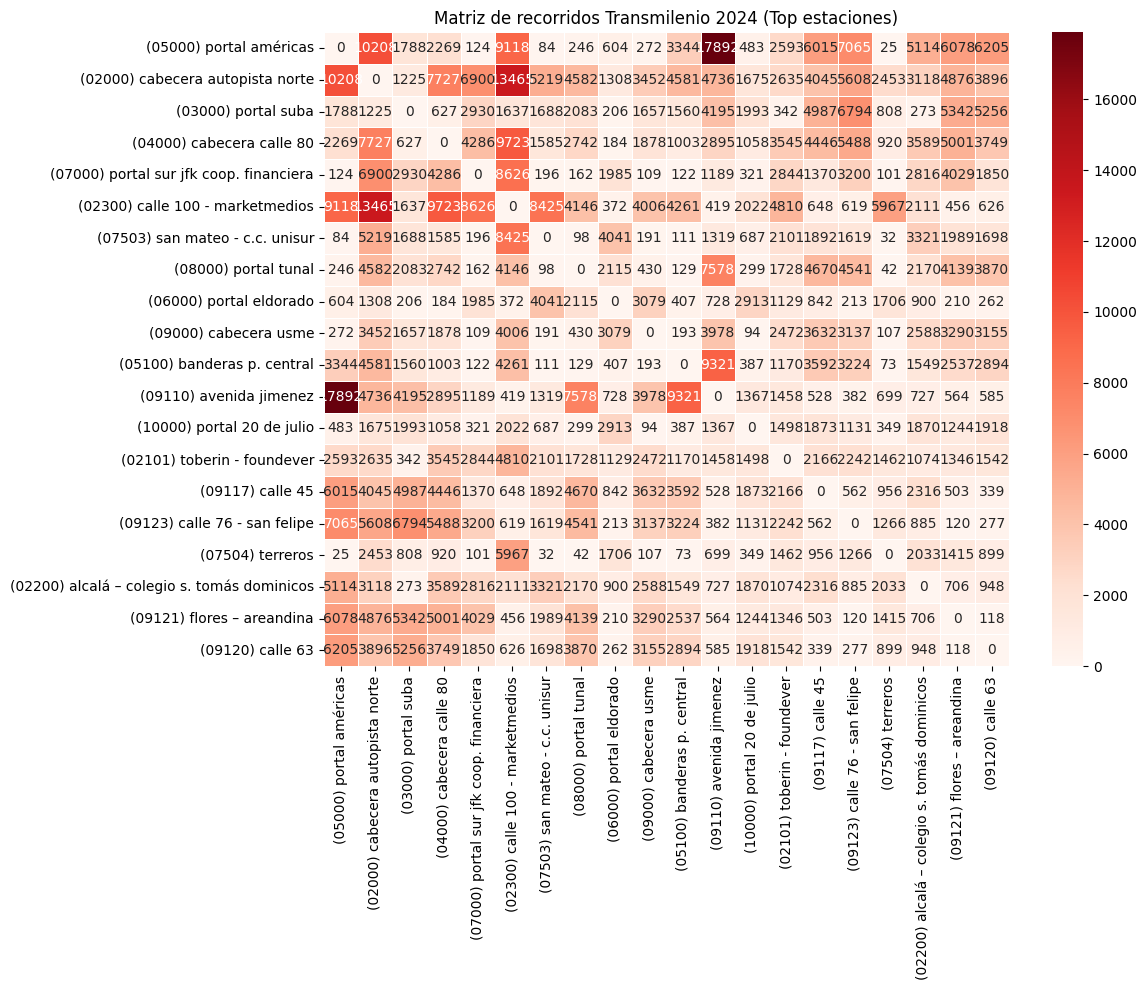

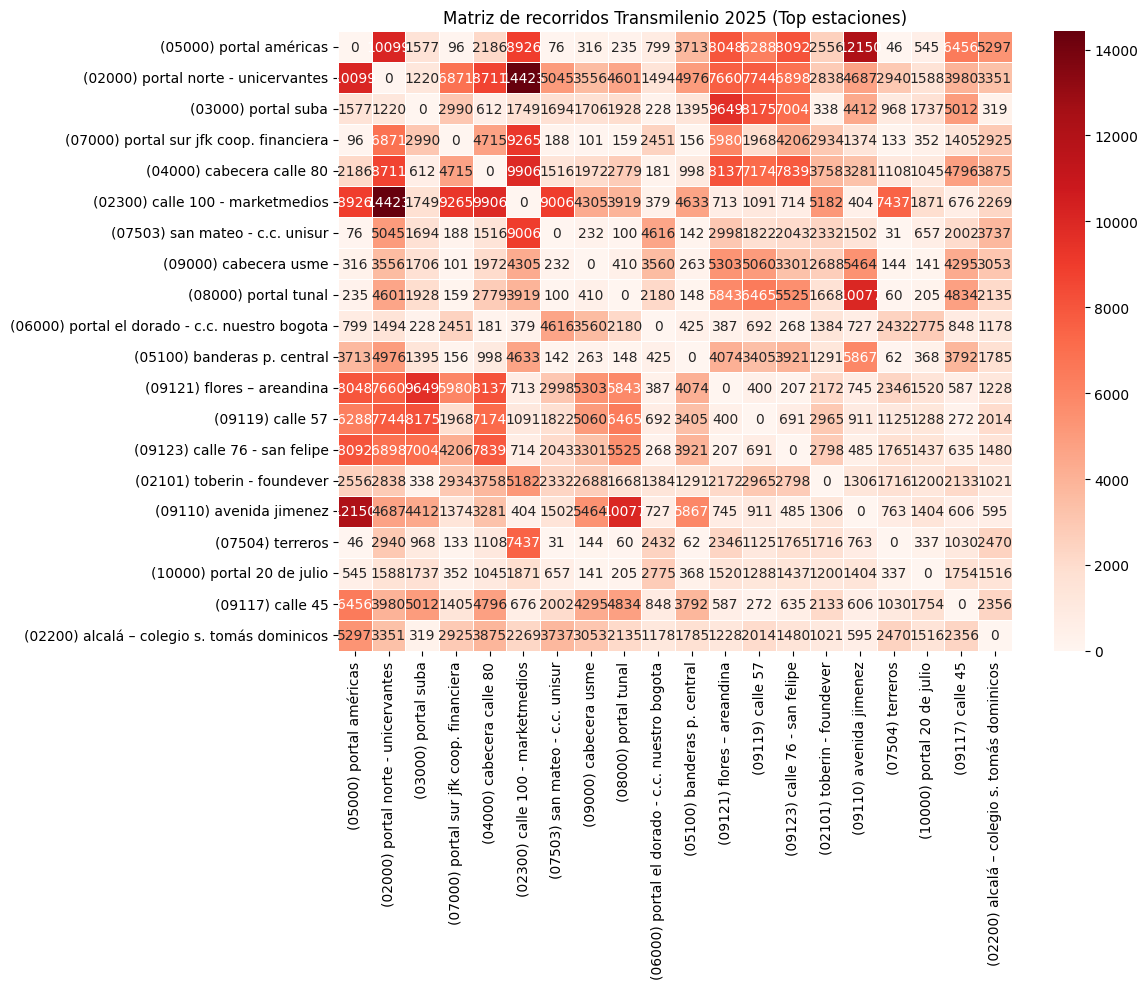

In [ ]:
import seaborn as sns
import pandas as pd

def heatmap_matriz_pesos(G, title):
    # Crear matriz de adyacencia con pesos
    adj = nx.to_pandas_adjacency(G, weight='weight')
    # Solo conservar filas/columnas con más viajes
    top_stations = adj.sum(axis=1).sort_values(ascending=False).head(20).index
    adj_top = adj.loc[top_stations, top_stations]

    # Plot
    plt.figure(figsize=(12, 10))
    sns.heatmap(adj_top, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Heatmaps de ambas redes
heatmap_matriz_pesos(G_2024, "Matriz de recorridos Transmilenio 2024 (Top estaciones)")
heatmap_matriz_pesos(G_2025, "Matriz de recorridos Transmilenio 2025 (Top estaciones)")


#### Diagrama tipo Sankey (para flujos entre estaciones)
Esto te permite ver cómo los usuarios fluyen de unas estaciones a otras (top 50).

In [ ]:
import plotly.graph_objects as go

def sankey_top_rutas(G, titulo, top_n=50):
    edges = sorted(G.edges(data=True), key=lambda x: float(x[2].get('weight', 0)), reverse=True)[:top_n]
    estaciones = list(set([u for u, v, _ in edges] + [v for u, v, _ in edges]))
    idx = {name: i for i, name in enumerate(estaciones)}

    source = [idx[u] for u, v, _ in edges]
    target = [idx[v] for u, v, _ in edges]
    value  = [float(data['weight']) for _, _, data in edges]

    fig = go.Figure(data=[go.Sankey(
        node=dict(label=estaciones, pad=15, thickness=20, line=dict(color="black", width=0.5)),
        link=dict(source=source, target=target, value=value)
    )])
    fig.update_layout(title_text=titulo, font_size=10)
    fig.show()

# Sankey para los top recorridos
sankey_top_rutas(G_2024, "Sankey - Top recorridos Transmilenio 2024")
sankey_top_rutas(G_2025, "Sankey - Top recorridos Transmilenio 2025")

### 4.5. Red 2024

In [ ]:
print(f"Nodos: {G_2024.number_of_nodes()}")
print(f"Aristas: {G_2024.number_of_edges()}")

Nodos: 148
Aristas: 10486


In [ ]:
# Crear el DataFrame con nodos y sus grados
df_grados = pd.DataFrame(G_2024.degree, columns=['nodo', 'grado'])

# Ordenar de forma descendente por grado
df_grados = df_grados.sort_values(by='grado', ascending=False).reset_index(drop=True)

In [ ]:
df_grados.head(15)

,nodo,grado
0,(09004) santa lucía,146
1,(09100) calle 40 sur,146
2,(07000) portal sur jfk coop. financiera,146
3,(04000) cabecera calle 80,146
4,(09104) restrepo,146
5,(08000) portal tunal,146
6,(07503) san mateo - c.c. unisur,146
7,(09110) avenida jimenez,146
8,(09001) molinos,146
9,(07504) terreros,146


Vemos estaciones como Santa Lucía o Calle 40 sur que tienen la mayor cantidad de conexiones con otras estaciones, es decir es origen o destino de varias rutas distintas

In [ ]:
# --- MEDIDAS LOCALES ---
degree_centrality = nx.degree_centrality(G_2024)
closeness_centrality = nx.closeness_centrality(G_2024)
betweenness_centrality = nx.betweenness_centrality(G_2024, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G_2024, weight='weight')
pagerank = nx.pagerank(G_2024, weight='weight')

# --- MEDIDAS GLOBALES ---
avg_degree = sum(dict(G_2024.degree()).values()) / len(G_2024)
density = nx.density(G_2024)
avg_closeness = sum(closeness_centrality.values()) / len(G_2024)
avg_betweenness = sum(betweenness_centrality.values()) / len(G_2024)
avg_eigenvector = sum(eigenvector_centrality.values()) / len(G_2024)
coeficiente_agrupamiento = nx.average_clustering(G_2024)
average_path_length = nx.average_shortest_path_length(G_2024)

# Unir resultados en un DataFrame para análisis
centralities_df = pd.DataFrame({
    'ID': list(G_2024.nodes()),
    'Degree Centrality': pd.Series(degree_centrality),
    'Closeness Centrality': pd.Series(closeness_centrality),
    'Betweenness Centrality': pd.Series(betweenness_centrality),
    'Eigenvector Centrality': pd.Series(eigenvector_centrality),
    'PageRank': pd.Series(pagerank)
})

centralities_df = centralities_df.sort_values(by='Degree Centrality', ascending=False)

In [ ]:
centralities_df

,ID,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,PageRank
(09004) santa lucía,(09004) santa lucía,0.993197,0.993243,0.000000,0.045006,0.006273
(09100) calle 40 sur,(09100) calle 40 sur,0.993197,0.993243,0.000000,0.042319,0.005791
(07000) portal sur jfk coop. financiera,(07000) portal sur jfk coop. financiera,0.993197,0.993243,0.000000,0.206023,0.026123
(04000) cabecera calle 80,(04000) cabecera calle 80,0.993197,0.993243,0.000000,0.238153,0.026680
(09104) restrepo,(09104) restrepo,0.993197,0.993243,0.000000,0.049378,0.007044
...,...,...,...,...,...,...
(03014) san martin,(03014) san martin,0.911565,0.918750,0.139738,0.004448,0.001451
(03004) gratamira,(03004) gratamira,0.877551,0.890909,0.103895,0.004853,0.001463
(09122) calle 72,(09122) calle 72,0.673469,0.753846,0.335963,0.001493,0.001135
(50003) corral molinos,(50003) corral molinos,0.108844,0.528777,0.140315,0.000314,0.001078


| Métrica                    | Qué mide                                                               | Interpretación en la red                                                                                          |
| -------------------------- | ---------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Degree Centrality**      | Proporción de estaciones directamente conectadas                       | Estaciones con más conexiones directas (transferencias frecuentes), pueden ser puntos de intercambio clave.       |
| **Closeness Centrality**   | Qué tan cerca está una estación del resto                              | Estaciones bien ubicadas en la red, permiten alcanzar otras estaciones rápidamente (ideal para nodos centrales).  |
| **Betweenness Centrality** | Frecuencia con que una estación está en caminos más cortos entre otras | Estaciones que actúan como puentes entre diferentes zonas (críticas: si fallan, interrumpen la red).              |
| **Eigenvector Centrality** | Importancia de una estación basada en la importancia de sus vecinas    | Estaciones importantes que están conectadas con otras importantes (no solo cantidad, sino calidad de conexiones). |
| **PageRank**               | Influencia global en la red considerando flujo                         | Estaciones donde los viajes tienden a converger o acumularse. Similar a cómo Google rankea páginas web.           |


In [ ]:
print("Medidas globales:")
print(f'"Average Degree": {avg_degree}')
print(f'"Density": {density}')
print(f'"Average Closeness": {avg_closeness}')
print(f'"Average Betweenness": {avg_betweenness}')
print(f'"Average Eigenvector": {avg_eigenvector}')
print(f'"Coeficiente de agrupamiento": {coeficiente_agrupamiento}')
print(f'"Average Path Length": {average_path_length}')

Medidas globales:
"Average Degree": 141.7027027027027
"Density": 0.963963963963964
"Average Closeness": 0.9713126352421658
"Average Betweenness": 0.013422475376541428
"Average Eigenvector": 0.058210842998483
"Coeficiente de agrupamiento": 0.9892489987168274
"Average Path Length": 1.0360360360360361


| Métrica                       | Qué mide                                          | Interpretación en tu red                                                                                   |
| ----------------------------- | ------------------------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| **avg\_degree**               | Conectividad promedio por nodo                    | Alta (141.7), indica red densamente conectada; muchas estaciones están enlazadas directamente.             |
| **density**                   | Proporción de enlaces posibles que existen        | Cercano a 1 ⇒ red casi completamente conectada (alta redundancia de rutas).                                |
| **avg\_closeness**            | Centralidad promedio de todas las estaciones      | Alta ⇒ la mayoría de estaciones son alcanzables con pocos saltos. Buena integración de la red.             |
| **avg\_betweenness**          | Promedio de flujo intermedio por nodo             | Si es bajo ⇒ pocos nodos dominan los flujos; si alto ⇒ flujo está repartido. Útil para ver vulnerabilidad. |
| **avg\_eigenvector**          | Influencia estructural promedio                   | Mayor valor ⇒ red está bien distribuida en términos de importancia de estaciones.                          |
| **coeficiente\_agrupamiento** | Nivel de "triangulación" entre vecinos (clusters) | Muy alto (≈0.99) ⇒ fuerte redundancia local, las estaciones vecinas también están conectadas entre sí.     |
| **average\_path\_length**     | Caminos más cortos promedio                       | Bajo (≈1.03) ⇒ se puede llegar a cualquier estación con 1 salto, red ultra eficiente en conectividad.      |


### 4.6. Red 2025

In [ ]:
print(f"Nodos: {G_2025.number_of_nodes()}")
print(f"Aristas: {G_2025.number_of_edges()}")

Nodos: 145
Aristas: 10104


In [ ]:
# Crear el DataFrame con nodos y sus grados
df_grados = pd.DataFrame(G_2025.degree, columns=['nodo', 'grado'])

# Ordenar de forma descendente por grado
df_grados = df_grados.sort_values(by='grado', ascending=False).reset_index(drop=True)

In [ ]:
df_grados.head(15)

,nodo,grado
0,(09110) avenida jimenez,144
1,(09001) molinos,144
2,(09100) calle 40 sur,143
3,(09005) danubio,143
4,(07106) el campin,143
5,(09107) hortúa,143
6,(09004) santa lucía,143
7,(09103) olaya,143
8,(08000) portal tunal,143
9,(06000) portal el dorado - c.c. nuestro bogota,143


Vemos estaciones como Avenida Jimenez o Molinos que tienen la mayor cantidad de conexiones con otras estaciones, es decir es origen o destino de varias rutas distintas

In [ ]:
# --- MEDIDAS LOCALES ---
degree_centrality = nx.degree_centrality(G_2025)
closeness_centrality = nx.closeness_centrality(G_2025)
betweenness_centrality = nx.betweenness_centrality(G_2025, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G_2025, weight='weight')
pagerank = nx.pagerank(G_2025, weight='weight')

# --- MEDIDAS GLOBALES ---
avg_degree = sum(dict(G_2025.degree()).values()) / len(G_2025)
density = nx.density(G_2025)
avg_closeness = sum(closeness_centrality.values()) / len(G_2025)
avg_betweenness = sum(betweenness_centrality.values()) / len(G_2025)
avg_eigenvector = sum(eigenvector_centrality.values()) / len(G_2025)
coeficiente_agrupamiento = nx.average_clustering(G_2025)
average_path_length = nx.average_shortest_path_length(G_2025)

# Unir resultados en un DataFrame para análisis
centralities_df = pd.DataFrame({
    'ID': list(G_2025.nodes()),
    'Degree Centrality': pd.Series(degree_centrality),
    'Closeness Centrality': pd.Series(closeness_centrality),
    'Betweenness Centrality': pd.Series(betweenness_centrality),
    'Eigenvector Centrality': pd.Series(eigenvector_centrality),
    'PageRank': pd.Series(pagerank)
})

centralities_df = centralities_df.sort_values(by='Degree Centrality', ascending=False)

In [ ]:
centralities_df

,ID,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,PageRank
(09110) avenida jimenez,(09110) avenida jimenez,1.000000,1.000000,0.000000,0.156508,0.014429
(09001) molinos,(09001) molinos,1.000000,1.000000,0.000000,0.053078,0.008453
(09100) calle 40 sur,(09100) calle 40 sur,0.993056,0.993103,0.000000,0.042095,0.005603
(09005) danubio,(09005) danubio,0.993056,0.993103,0.016708,0.017476,0.003346
(07106) el campin,(07106) el campin,0.993056,0.993103,0.000000,0.062387,0.006822
...,...,...,...,...,...,...
(04107) escuela militar,(04107) escuela militar,0.902778,0.911392,0.073546,0.006152,0.001594
(03004) gratamira,(03004) gratamira,0.895833,0.905660,0.210371,0.004443,0.001434
(50008) corral portal dorado,(50008) corral portal dorado,0.854167,0.872727,0.392620,0.136139,0.008439
(50003) corral molinos,(50003) corral molinos,0.111111,0.529412,0.140841,0.000338,0.001117


| Métrica                    | Qué mide                                                               | Interpretación en la red                                                                                          |
| -------------------------- | ---------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Degree Centrality**      | Proporción de estaciones directamente conectadas                       | Estaciones con más conexiones directas (transferencias frecuentes), pueden ser puntos de intercambio clave.       |
| **Closeness Centrality**   | Qué tan cerca está una estación del resto                              | Estaciones bien ubicadas en la red, permiten alcanzar otras estaciones rápidamente (ideal para nodos centrales).  |
| **Betweenness Centrality** | Frecuencia con que una estación está en caminos más cortos entre otras | Estaciones que actúan como puentes entre diferentes zonas (críticas: si fallan, interrumpen la red).              |
| **Eigenvector Centrality** | Importancia de una estación basada en la importancia de sus vecinas    | Estaciones importantes que están conectadas con otras importantes (no solo cantidad, sino calidad de conexiones). |
| **PageRank**               | Influencia global en la red considerando flujo                         | Estaciones donde los viajes tienden a converger o acumularse. Similar a cómo Google rankea páginas web.           |


In [ ]:
print("Medidas globales:")
print(f'"Average Degree": {avg_degree}')
print(f'"Density": {density}')
print(f'"Average Closeness": {avg_closeness}')
print(f'"Average Betweenness": {avg_betweenness}')
print(f'"Average Eigenvector": {avg_eigenvector}')
print(f'"Coeficiente de agrupamiento": {coeficiente_agrupamiento}')
print(f'"Average Path Length": {average_path_length}')

Medidas globales:
"Average Degree": 139.3655172413793
"Density": 0.967816091954023
"Average Closeness": 0.9744579071723267
"Average Betweenness": 0.015327232688129515
"Average Eigenvector": 0.05938923560152101
"Coeficiente de agrupamiento": 0.9909845710421866
"Average Path Length": 1.032183908045977


| Métrica                       | Qué mide                                          | Interpretación en la red                                                                                   |
| ----------------------------- | ------------------------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| **avg\_degree**               | Conectividad promedio por nodo                    | Alta (139.3), indica red densamente conectada; muchas estaciones están enlazadas directamente.             |
| **density**                   | Proporción de enlaces posibles que existen        | Cercano a 1 ⇒ red casi completamente conectada (alta redundancia de rutas).                                |
| **avg\_closeness**            | Centralidad promedio de todas las estaciones      | Alta ⇒ la mayoría de estaciones son alcanzables con pocos saltos. Buena integración de la red.             |
| **avg\_betweenness**          | Promedio de flujo intermedio por nodo             | Si es bajo ⇒ pocos nodos dominan los flujos; si alto ⇒ flujo está repartido. Útil para ver vulnerabilidad. |
| **avg\_eigenvector**          | Influencia estructural promedio                   | Mayor valor ⇒ red está bien distribuida en términos de importancia de estaciones.                          |
| **coeficiente\_agrupamiento** | Nivel de "triangulación" entre vecinos (clusters) | Muy alto (≈0.99) ⇒ fuerte redundancia local, las estaciones vecinas también están conectadas entre sí.     |
| **average\_path\_length**     | Caminos más cortos promedio                       | Bajo (≈1.03) ⇒ se puede llegar a cualquier estación con 1 salto, red ultra eficiente en conectividad.      |
